## A Louvain Community Detection Algorithm

This notebook file aims to give out an easy example of using Louvain community detection algorithm in our structural connectivity data. For the Louvain community algorithm, it is a method to extract communities from large networks. The original paper can be found in [here](https://iopscience.iop.org/article/10.1088/1742-5468/2008/10/P10008/pdf). One sentence version: this algorithm is evaluating the density of the nodes within a community, then generating classification results.

In [1]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import io, os
import pandas as pd
plt.style.use('ggplot')


In [2]:
# define the graph
# edge = []
# for i in range(16):
#     for z in range(16):
#         if i != z:
#             edge.append((i,z))

In [3]:
### label information
node_names = {0:'aCNG-L', 1:'aCNG-R',2: 'mCNG-L',3:'mCNG-R',4:'pCNG-L',5:'pCNG-R', 6:'HIP-L',7:'HIP-R',8:'PHG-L',9:'PHG-R',10:'AMY-L',11:'AMY-R', 12:'sTEMp-L',13:'sTEMp-R',14:'mTEMp-L',15:'mTEMp-R'}

### read weight matrix
#! wget -c -O sc.txt --no-check-certificate https://github.com/yilewang/tvbdemos/raw/master/sc.txt 
cwd = os.getcwd()
pth = cwd + '/sc.txt' #! change to your own path
openSC = open(pth,"r")
lines = openSC.read()
df = pd.read_csv(io.StringIO(lines), sep='\t', header=None, index_col=None, engine="python")

### drop the edge with weights less than 1
edge = []
for j in range(16):
    for k in range(16):
        if df.iloc[j,k] > 1:
            edge.append((j,k))

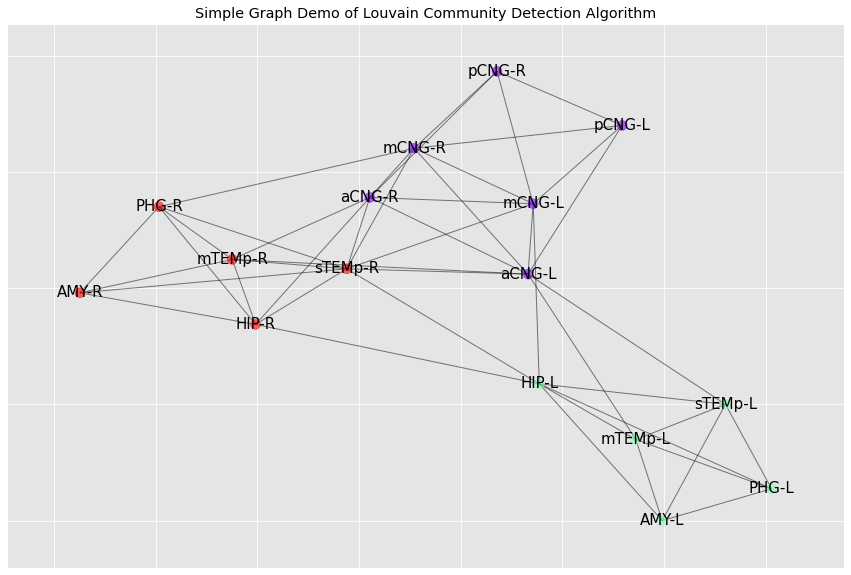

In [4]:
### create edge network
G = nx.Graph()
G.add_edges_from(edge)

### retrun partition as a dict
partition = community_louvain.best_partition(G)

### visualization
plt.figure(figsize=(15,10))
plt.title("Simple Graph Demo of Louvain Community Detection Algorithm")
pos = nx.spring_layout(G)
cmap = cm.get_cmap('rainbow', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,cmap=cmap, node_color=list(partition.values()), alpha=0.6)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, node_names, font_size=15, font_color="black")
plt.show()